<a href="https://colab.research.google.com/github/mcnica89/FunProblems/blob/main/HermiteAsymptoticsPlot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import eval_hermite
from scipy.constants import pi
from scipy.special import airy as scipy_airy
from scipy.special import factorial

In [9]:
def airy(x):
  return scipy_airy(x)[0] #the scipy airy returns a 4 tuple with Ai and related things

In [10]:
def my_hermite(n,x,t=1):
  print(t)
  return (2*t)**(-n/2) * eval_hermite(n,x /np.sqrt(2*t))

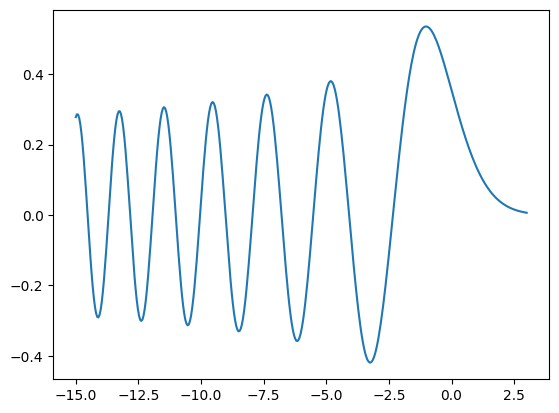

In [11]:
axis = np.linspace(-15, 3, 400)
#plt.plot(axis,my_hermite(3, axis))
plt.plot(axis,airy(axis))


In [12]:
np.log(2.7)

np.float64(0.9932517730102834)

1
1


<ipython-input-14-f9a2f2659e07>:44: RuntimeWarning: divide by zero encountered in power
  * ( 1 - a_vals**2 / (4 * n) )**(-1.0/4)
<ipython-input-14-f9a2f2659e07>:71: RuntimeWarning: divide by zero encountered in divide
  2 * np.exp(-phi)


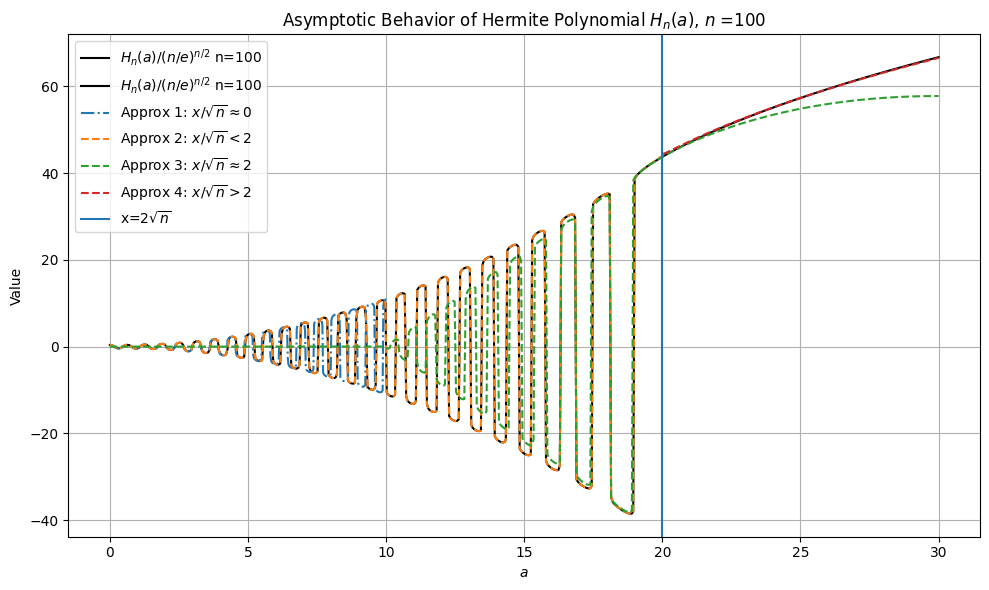

1
1


<ipython-input-14-f9a2f2659e07>:30: RuntimeWarning: divide by zero encountered in power
  * ( 1 - a_vals**2 / (4 * n) )**(-1.0/4)


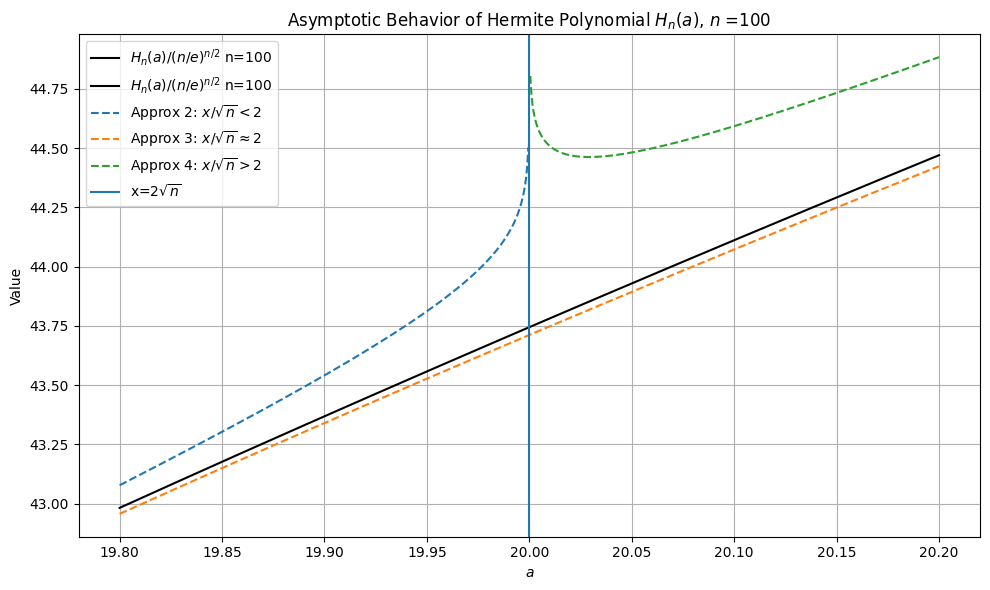

In [14]:

def my_plot(n=3, mode = 'regular'):
  # Parameters
  #n = 40  # large n
  c = 2.0
  if mode == 'zoomed':
    a_vals_extra_small = np.linspace(0.99*c*np.sqrt(n), c*np.sqrt(n), 400) #-np.sqrt(n)/2, np.sqrt(n)/2
    a_vals_small = np.linspace(0.99*c*np.sqrt(n),c*np.sqrt(n), 400) #-np.sqrt(n)/2, np.sqrt(n)/2
    a_vals_big = np.linspace(c*np.sqrt(n), 1.01*c*np.sqrt(n), 400) #-np.sqrt(n)/2, np.sqrt(n)/2
  else:
    a_vals_extra_small = np.linspace(0, 0.5*c*np.sqrt(n), 400) #-np.sqrt(n)/2, np.sqrt(n)/2
    a_vals_small = np.linspace(0,c*np.sqrt(n), 400) #-np.sqrt(n)/2, np.sqrt(n)/2
    a_vals_big = np.linspace(c*np.sqrt(n), 1.5*c*np.sqrt(n), 400) #-np.sqrt(n)/2, np.sqrt(n)/2


  # LHS: H_n(a,1) = Hermite polynomial
  lhs_small = (
      my_hermite(n, a_vals_small)
      / (n / np.e) ** (n / 2)
  )

  lhs_big = (
      my_hermite(n, a_vals_big)
      / (n / np.e) ** (n / 2)
  )
  a_vals = a_vals_extra_small #
  rhs1 = (
      np.sqrt(2)
      * np.exp(a_vals**2 / 4)
      * np.cos(n * pi / 2 - a_vals * np.sqrt(n))
      * ( 1 - a_vals**2 / (4 * n) )**(-1.0/4)
    )

  a_vals = a_vals_small
  a = a_vals / np.sqrt(4*n)
  cos_arg = (
          n * (a * np.sqrt(1 - a**2) - np.arccos(a))
          - 0.5*( np.arccos(a) - np.pi/2 )
  )

  rhs2 = (
      np.sqrt(2)
      * np.exp(a_vals**2 / 4)
      * np.cos( cos_arg )
      * ( 1 - a_vals**2 / (4 * n) )**(-1.0/4)
    )
  ####

  a_vals = np.concatenate((a_vals_small, a_vals_big))
  x = ( a_vals / (2*np.sqrt(n)) - 1 )*n**(2/3)*2

  rhs3 = (
      np.sqrt(2*np.pi)
      * np.exp( x*n**(1/3) )
      * (np.sqrt(np.e)/2)**n
      * n**(1/6)
      * airy(x)
      / (n / np.e) ** (n / 2)
      * (4*n)**(n/2)
  )




  ###

  a = a_vals_big / np.sqrt(4*n)

  phi = np.arccosh(a)

  rhs4 = (
      2 * np.exp(-phi)
      * np.exp(n*(-np.log(2) + phi + 0.5*np.exp(-2*phi) ))
      / (n / np.e) ** (n / 2)
      * (4*n)**(n/2)
      / np.sqrt(np.sinh(phi))
    )

  # Normalize both sides for comparison
  #lhs_norm = lhs
  #rhs_norm = rhs

  # Plot
  def f(x):
    return np.sign(x)*np.log10(np.abs(x)+1)
  plt.plot(a_vals_small, f(lhs_small), label=f"$H_n(a)/(n/e)^{{n/2}}$ n={n}",color='black')
  plt.plot(a_vals_big, f(lhs_big), label=f"$H_n(a)/(n/e)^{{n/2}}$ n={n}",color='black')

  if mode != 'zoomed':
    plt.plot(a_vals_extra_small, f(rhs1), label=r"Approx 1: $x/\sqrt{n} \approx 0$", linestyle='-.')

  plt.plot(a_vals_small, f(rhs2), label=r"Approx 2: $x/\sqrt{n} < 2$", linestyle='--')


  plt.plot(a_vals, f(rhs3), label=r"Approx 3: $x/\sqrt{n} \approx 2$", linestyle='--')

  plt.plot(a_vals_big, f(rhs4), label=r"Approx 4: $x/\sqrt{n} > 2$", linestyle='--')
  #plt.plot(a_vals_big, n*np.sinh(phi)/4, label="Approx 4: $a/\sqrt{n} > 2$", linestyle='--')


  plt.axvline(x=2*np.sqrt(n),label=r'x=$2\sqrt{n}$', linestyle = '-')

  #plt.axvline(x=2*np.sqrt(n) - n**(1/6),label=r'a=$2\sqrt{n} - n**{1/6}$', linestyle = ':')

  #plt.axvline(x=2*np.sqrt(n) + n**(1/6),label=r'a=$2\sqrt{n} + n**{1/6}$', linestyle = ':')
  #plt.plot(a_vals, np.log(np.abs(rhs)+1), label=f"Approx with n={n}", linestyle='--')
  #plt.plot(a_vals,np.arctan( 2*np.sqrt(4*n - a_vals**2) / a_vals ))


plt.figure(figsize=(10, 6))
#for n in [100]: #,5,10,20]:
n=100
my_plot(n,mode='regular')
plt.title(f"Asymptotic Behavior of Hermite Polynomial $H_{{n}}(a)$, $n$ ={n}")
plt.xlabel("$a$")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
#for n in [100]: #,5,10,20]:
n=100
my_plot(n,mode='zoomed')
plt.title(f"Asymptotic Behavior of Hermite Polynomial $H_{{n}}(a)$, $n$ ={n}")
plt.xlabel("$a$")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:

def my_plot_Airy(n=3):
  # Parameters
  #n = 40  # large n
  x_vals = np.linspace(-0.1,0.1, 400) #-np.sqrt(n)/2, np.sqrt(n)/2

  # LHS: H_n(a,1) = Hermite polynomial
  lhs = (
        my_hermite(n, 1.0 + x_vals/(2*n**(2/3)), t=1/(4*n))
  )
  # RHS: asymptotic expression
  rhs = (
      np.sqrt(2*np.pi)
      * (2/np.sqrt(np.e))**n
      * n**(1/6)
      * airy(x_vals)
  )

  # Normalize both sides for comparison
  lhs_norm = lhs
  rhs_norm = rhs

  # Plot
  plt.plot(x_vals, lhs_norm, label=f"$H_n(a)/(n/e)^{{n/2}}$ n={n}")
  plt.plot(x_vals, rhs_norm, label=f"Approx n={n}", linestyle='--')

plt.figure(figsize=(10, 6))
for n in [100]:
  my_plot_Airy(n)
plt.title(f"Asymptotic Behavior of Hermite Polynomial $H_{{n}}(a)$")
plt.xlabel("$a$")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
